# L1 and L2 regularization 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(800, noise=0.3)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [4]:
def plot_data_and_model_decision(
    X, y,
    model=None,
    x1limits=(-2.0, 3.0),
    x2limits=(-1.5, 2.0),
    npoints=250,
    make_figure=True
):
    if make_figure:
        plt.figure(figsize=(6, 6), dpi=100)

    plt.scatter(*X.T, c=y, cmap='PiYG')
    
    plt.xlim(*x1limits)
    plt.ylim(*x2limits)
    
    if model is not None:
        xx1, xx2 = np.meshgrid(
            np.linspace(*x1limits, npoints),
            np.linspace(*x2limits, npoints)
        )
        yy = model.predict(
            np.stack([xx1.ravel(), xx2.ravel()], axis=1)
        ).reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, yy, levels=30, cmap='PiYG', alpha=0.5)

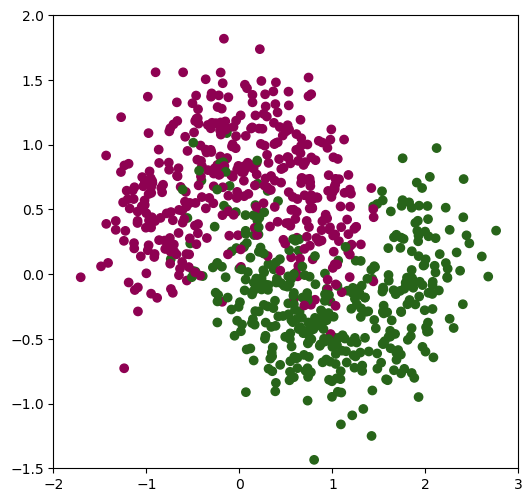

In [5]:
plot_data_and_model_decision(X, y)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [7]:
from tqdm import tqdm

100%|██████████| 16/16 [00:04<00:00,  3.92it/s]


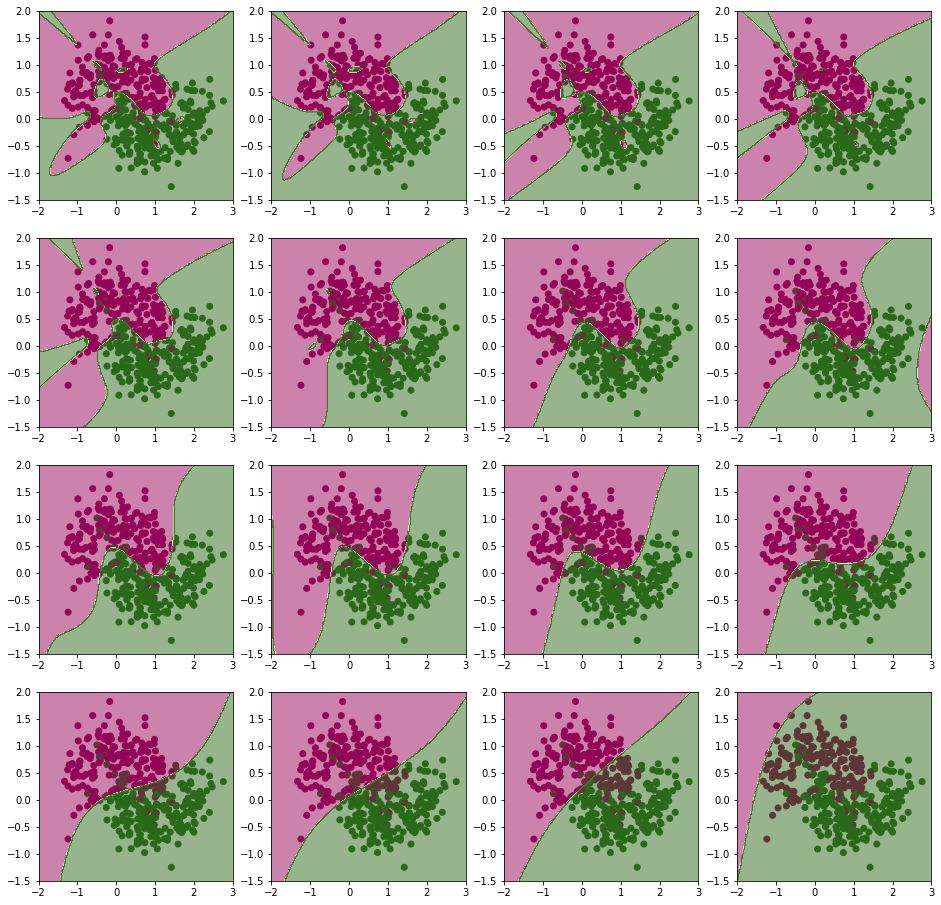

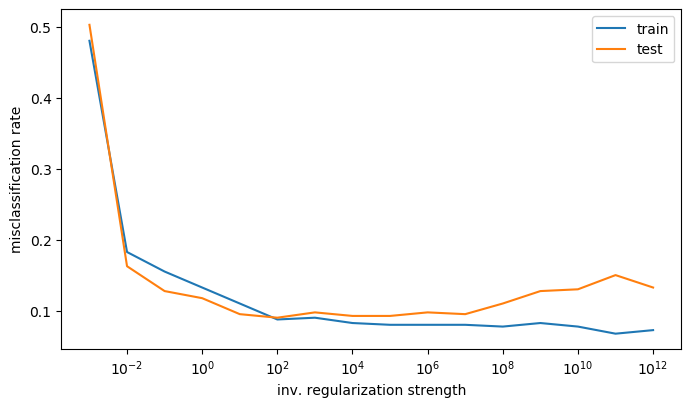

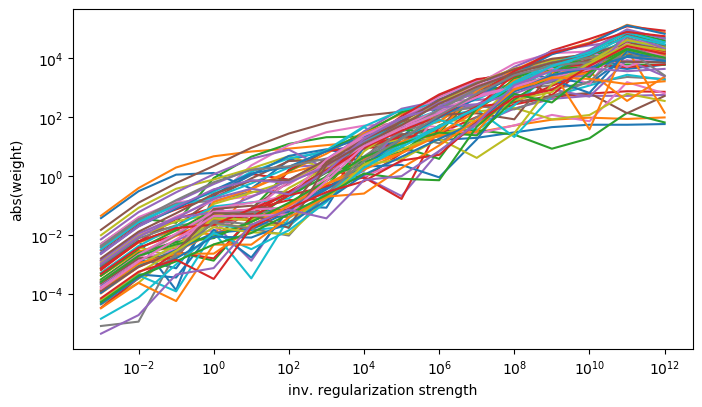

In [8]:
sqrt_num_plots = 4

inverse_regularization_powers = np.logspace(12, -3, sqrt_num_plots**2)

plt.figure(figsize=(16, 16))

models = []
train_scores = []
test_scores = []

for i, C in enumerate(tqdm(inverse_regularization_powers)):
    model = make_pipeline(
        MinMaxScaler((-0.9, 0.9)),
        PolynomialFeatures(10, include_bias=False),
        LogisticRegression(penalty='l2', C=C, solver='newton-cg', max_iter=100000)
    )

    model.fit(X_train, y_train);
    models.append(model)
    train_scores.append((model.predict(X_train) == y_train).mean())
    test_scores.append((model.predict(X_test) == y_test).mean())
    
    plt.subplot(sqrt_num_plots, sqrt_num_plots, i + 1)
    plot_data_and_model_decision(X_train, y_train, model, make_figure=False)


train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

plt.figure(figsize=(8, 4.5), dpi=100)
plt.plot(inverse_regularization_powers, 1. - train_scores, label='train')
plt.plot(inverse_regularization_powers, 1. - test_scores, label='test')
plt.legend();
plt.xlabel('inv. regularization strength')
plt.ylabel('misclassification rate')
plt.xscale('log');


weights = np.array([model.steps[-1][1].coef_ for model in models]).squeeze()
plt.figure(figsize=(8, 4.5), dpi=100)
for w in weights.T:
    plt.plot(inverse_regularization_powers, np.abs(w));
plt.xscale('log')
plt.yscale('log')
plt.xlabel('inv. regularization strength')
plt.ylabel('abs(weight)');

100%|██████████| 64/64 [00:39<00:00,  1.63it/s]


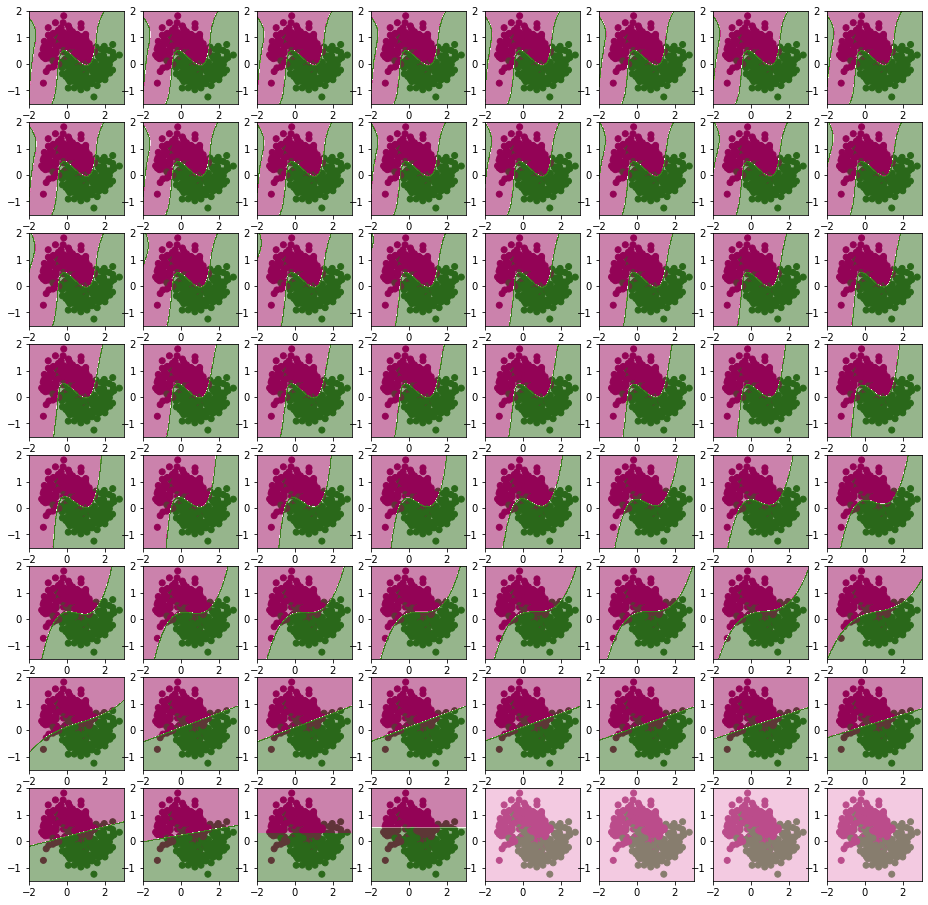

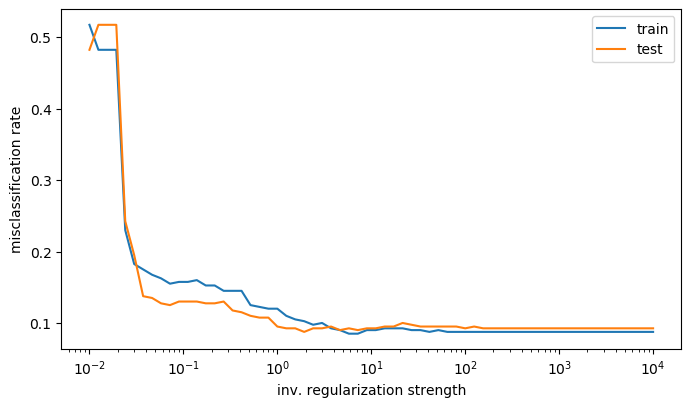

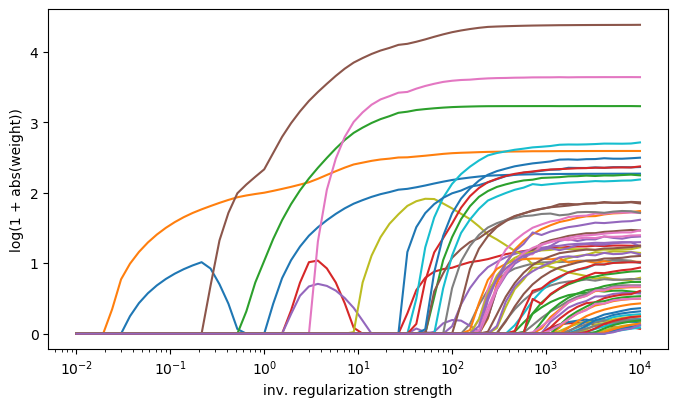

In [9]:
sqrt_num_plots = 8

inverse_regularization_powers = np.logspace(4, -2, sqrt_num_plots**2)

plt.figure(figsize=(16, 16))

models = []
train_scores = []
test_scores = []

for i, C in enumerate(tqdm(inverse_regularization_powers)):
    model = make_pipeline(
        MinMaxScaler((-0.9, 0.9)),
        PolynomialFeatures(10, include_bias=False),
        LogisticRegression(penalty='l1', C=C, solver='saga', max_iter=10000)
    )

    model.fit(X_train, y_train);
    models.append(model)
    train_scores.append((model.predict(X_train) == y_train).mean())
    test_scores.append((model.predict(X_test) == y_test).mean())
    
    plt.subplot(sqrt_num_plots, sqrt_num_plots, i + 1)
    plot_data_and_model_decision(X_train, y_train, model, make_figure=False)


train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

plt.figure(figsize=(8, 4.5), dpi=100)
plt.plot(inverse_regularization_powers, 1. - train_scores, label='train')
plt.plot(inverse_regularization_powers, 1. - test_scores, label='test')
plt.legend();
plt.xlabel('inv. regularization strength')
plt.ylabel('misclassification rate')
plt.xscale('log');


weights = np.array([model.steps[-1][1].coef_ for model in models]).squeeze()
plt.figure(figsize=(8, 4.5), dpi=100)
for w in weights.T:
    plt.plot(inverse_regularization_powers, np.log1p(np.abs(w)));
plt.xscale('log')
plt.xlabel('inv. regularization strength')
plt.ylabel('log(1 + abs(weight))');

---------

## Final quest

Build a model for the regression problem below to beat the score of test MSE < 0.0005.
You may try using `sklearn.linear_model.Ridge` or `sklearn.linear_model.Lasso` linear models.

In [10]:
from scipy.special import sph_harm as unknown_magic_function
from sklearn.linear_model import Ridge, Lasso

def gen_data(N=2000):
    X1 = np.random.uniform(-1, 1, size=(N, 2))
    X2 = np.random.randint(0, 3, size=(N, 1))
    X3 = np.round(np.random.uniform(-1, 1, size=(N, 1)) * X2).astype(int)
    
    y = unknown_magic_function(X3[:,0], X2[:,0], *np.arccos(X1.T)).imag
    
    X = np.concatenate([X1, X2, X3], axis=1)
    
    return X, y

X_train, y_train = gen_data()
X_test, y_test = gen_data()

### BEGIN SOLUTION
model = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(15, include_bias=False),
    Ridge(0.000001)
)
### END SOLUTION

model.fit(X_train, y_train)

print(((model.predict(X_train) - y_train)**2).mean())
print(((model.predict(X_test) - y_test)**2).mean())

1.3384410112047928e-05
0.0003320633938701439


In [11]:
from scipy.special import sph_harm as unknown_magic_function
from sklearn.linear_model import Ridge, Lasso

def gen_data(N=2000):
    X1 = np.random.uniform(-1, 1, size=(N, 2))
    X2 = np.random.randint(0, 3, size=(N, 1))
    X3 = np.round(np.random.uniform(-1, 1, size=(N, 1)) * X2).astype(int)
    
    y = unknown_magic_function(X3[:,0], X2[:,0], *np.arccos(X1.T)).imag
    
    X = np.concatenate([X1, X2, X3], axis=1)
    
    return X, y

X_train, y_train = gen_data()
X_test, y_test = gen_data()

model.fit(X_train, y_train)

test_mse = ((model.predict(X_test) - y_test)**2).mean()

assert test_mse < 0.0005, test_mse